# MonoVariable Linear Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


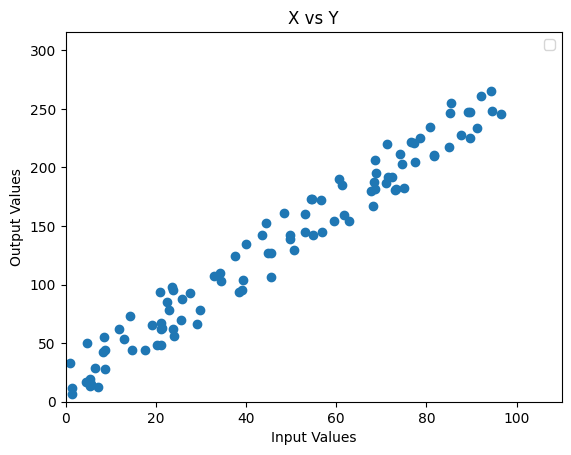

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Generar datos aleatorios para X entre 0 y 100
X = [random.uniform(0, 100) for _ in range(100)]

# Generar Y con una relación lineal con X, añadiendo algo de ruido
Y = [2.5 * x + 17 + random.uniform(-25, 25) for x in X] 
plt.scatter(X,Y)
plt.title('X vs Y')

plt.xlim(0,110)
plt.ylim(0,max(Y)+50)

plt.xlabel('Input Values')
plt.ylabel('Output Values')

plt.legend()
plt.show()


In [2]:
def linear_reg(X,Y):
    #Suposse an equation Y = a*x + b
    # a = [n * sum(xy) - sum(x) * sum(y)] / [n * sum(x^2) - (sum(x))^2]
    # b = [sum(y) * sum(x^2) - sum(x) * sum(xy)] / [n * sum(x^2) - (sum(x))^2]

    n = len(Y)
    sum_y  = sum(Y)

    sum_x  = sum(X)
    sum_x2 = sum(x**2 for x in X)

    sum_xy = sum(X[i]*Y[i] for i in range(0,n))

    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

    print(f'a: {a}')
    print(f'b: {b}')
    return a,b



[a,b] = linear_reg(X,Y)



a: 2.528861886785069
b: 14.926985501981028


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


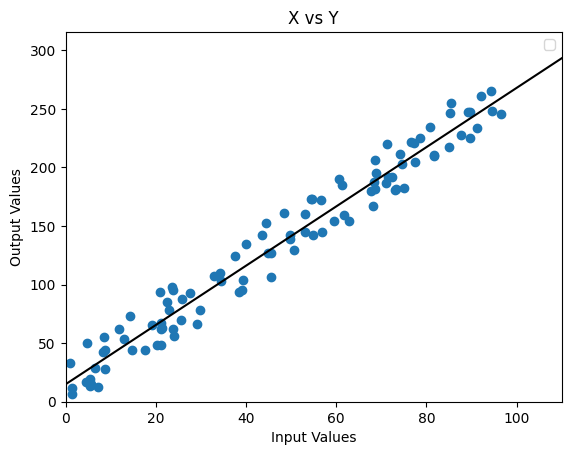

In [3]:
plt.scatter(X,Y)
plt.title('X vs Y')

plt.xlim(0,110)
plt.ylim(0,max(Y)+50)

plt.plot([0, 110], [a*0+b, a*110+b], 'k-')

plt.xlabel('Input Values')
plt.ylabel('Output Values')

plt.legend()
plt.show()

# MultiVariable Linear Regression:

Now we have to solve the equations for a linear regression like

Y = a1 * x1 + a2 * x2 + b

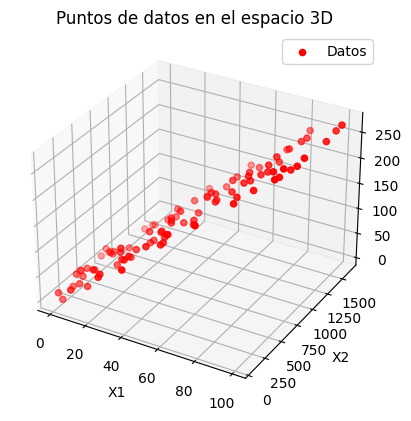

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos aleatorios para X entre 0 y 100
X1 = [random.uniform(0, 100) for _ in range(100)]

# Generar Y con una relación lineal con X, añadiendo algo de ruido
Y = [2.5 * x1 + 17 + random.uniform(-25, 25) for x1 in X1] 

# Generar X2 con una relacion lineal con Y, añadiendo ruido
X2 = [6.125 * y  + random.uniform(-50, 50) for y in Y] 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos originales
ax.scatter(X1, X2, Y, color='red', label='Datos')

# Etiquetas y título
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Puntos de datos en el espacio 3D')

plt.legend()
plt.show()


completely appart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the PDF of X ~ Uniform[0, theta]
def uniform_pdf(x, theta):
    return 1 / theta if 0 <= x <= theta else 0

# Define likelihood
def likelihood(n, theta, X_samples):
    return (1/theta)**n if (theta > np.max(X_samples) and theta > 0) else 0

# Function to update the plot based on n and theta
def update_plot(n, theta):
    # Generate samples of X ~ Unif(0, theta)
    X_samples = np.random.uniform(0, theta, n)

    # Create pdf values
    x_values = np.linspace(-0.05*theta, theta*1.05, 1000)
    pdf_values = [uniform_pdf(x, theta) for x in x_values]

    # Create likelihood values
    t = np.linspace(np.max(X_samples), 2*theta, 1000)
    likelihood_values = [likelihood(len(X_samples), v, X_samples) for v in t]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Plot on the left (linear y-axis)
    ax1.plot(x_values, pdf_values, color="blue", label="Unif$(0,\\theta)$", linewidth=2)
    ax1.scatter(X_samples, [0 for _ in X_samples], color='red', zorder=5, label='Samples of X')
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x) (Linear scale)", color="blue")
    ax1.grid(True)
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.legend(loc="upper left")

    # Create a second y-axis with a log scale
    ax2 = ax1.twinx()  
    ax2.plot(t, likelihood_values, label=f"Likelihood $L(\\theta)$", color="green", linewidth=2)
    ax2.set_ylabel("$L(\\theta)$ (Log scale)", color="green")
    ax2.set_yscale("log")
    ax2.tick_params(axis='y', labelcolor="green")
    ax2.legend(loc="upper right")

    # Title
    plt.title(f"PDF of X ~ Uniform[0, {theta:.2f}] with n={n}")
    fig.tight_layout()
    plt.show()

def reset_parameters(button):
    n_slider.value = 5
    theta_slider.value = 5.0
    update_plot(n_slider.value, theta_slider.value)
    pass

# Create interactive sliders for n and theta
n_slider = widgets.IntSlider(value=5, min=1, max=100, step=1, description='Samples:', layout=widgets.Layout(width="600px"))
theta_slider = widgets.FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1, description='Theta (θ):', layout=widgets.Layout(width="600px"))

# Create reset button
reset_button = widgets.Button(description="Reset to Unif(0,5)", layout=widgets.Layout(width="500px"))
reset_button.on_click(reset_parameters)
display(reset_button)

# Use interact to link sliders to the update_plot function
widgets.interactive(update_plot, n=n_slider, theta=theta_slider)

Button(description='Reset to Unif(0,5)', layout=Layout(width='500px'), style=ButtonStyle())

interactive(children=(IntSlider(value=5, description='Samples:', layout=Layout(width='600px'), min=1), FloatSl…